In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import seaborn as sns
from sklearn.metrics import roc_curve, auc,accuracy_score,confusion_matrix
import collections
import datetime
from matplotlib import pyplot
import pip
from scipy import stats


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(train.columns)

print('Missing values per attribute in train:')
print(train.apply(lambda x: x.isnull().sum(), axis=0) * 100 / len(train))

print('Rows with missing values in train:')
print(train.apply(lambda x: (x.isnull().sum() > 0), axis=1).sum() * 100 / len(train))


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
Missing values per attribute in train:
Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64
Rows with missing values in train:
21.8241042345


In [4]:

print('Missing values per attribute in test:')
print(test.apply(lambda x: x.isnull().sum(), axis=0) * 100 / len(test))

print('Rows with missing values in test:')
print(test.apply(lambda x: (x.isnull().sum() > 0), axis=1).sum() * 100 / len(train))


Missing values per attribute in test:
Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64
Rows with missing values in test:


12.7035830619


In [5]:
# Let's how each variable affects the target variable Loan_Status' individually
# Map Y to 1 and N to 0
train.Loan_Status = train.apply(lambda x: (1 if x['Loan_Status'] == 'Y' else 0),axis=1)
# See percentage of loans apporved
print(train.Loan_Status.mean() * 100)


68.72964169381108


/ext/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


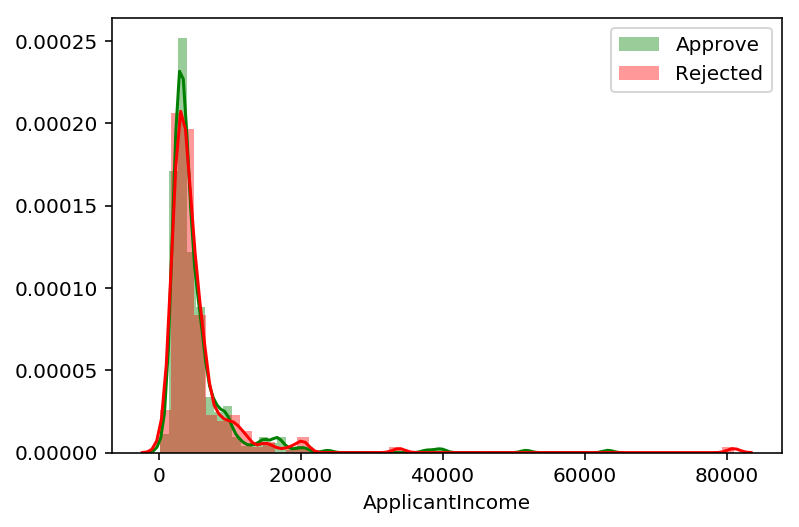

In [6]:
# Continuous
field = 'ApplicantIncome'
sns.distplot(train[train.Loan_Status == 1][field],color='g')
sns.distplot(train[train.Loan_Status == 0][field],color='r')
plt.legend(['Approve','Rejected'])
plt.show()


/ext/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


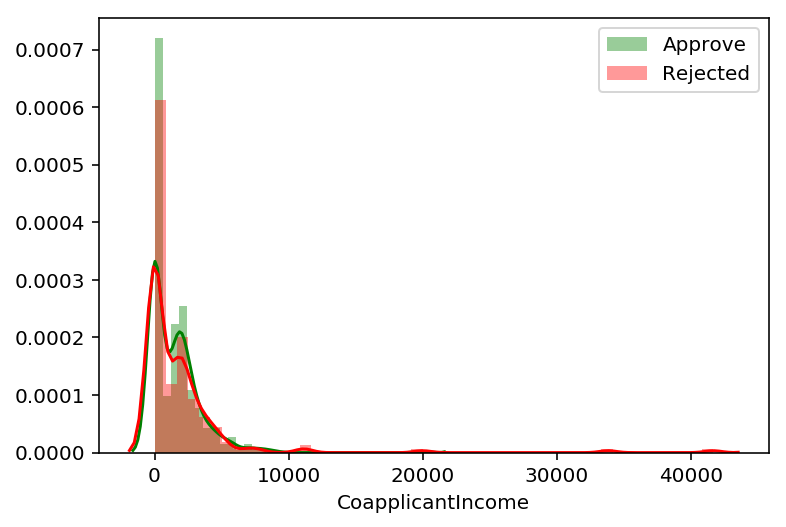

In [7]:
field = 'CoapplicantIncome'
sns.distplot(train[train.Loan_Status == 1][field],color='g')
sns.distplot(train[train.Loan_Status == 0][field],color='r')
plt.legend(['Approve','Rejected'])
plt.show()

/ext/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


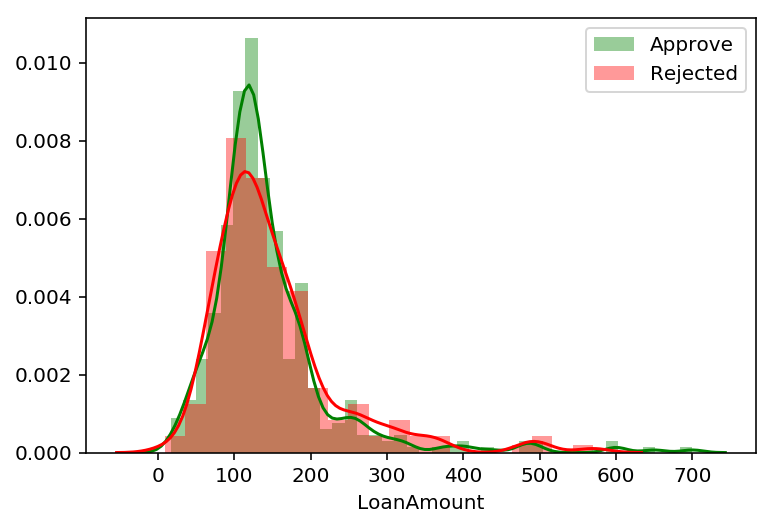

In [8]:
field = 'LoanAmount'
sns.distplot(train[(~train.LoanAmount.isnull()) & (train.Loan_Status == 1)][field],color='g')
sns.distplot(train[(~train.LoanAmount.isnull()) & (train.Loan_Status == 0)][field],color='r')
plt.legend(['Approve','Rejected'])
plt.show()

/ext/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


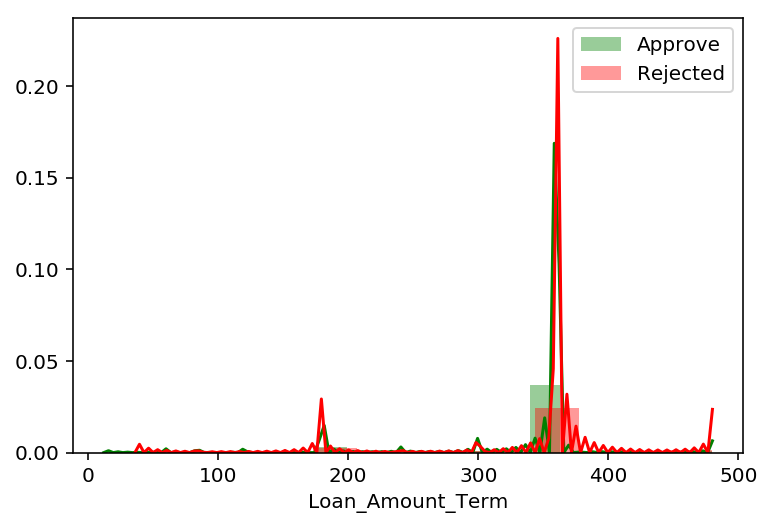

In [9]:
field = 'Loan_Amount_Term'
sns.distplot(train[(~train.Loan_Amount_Term.isnull()) & (train.Loan_Status == 1)][field],color='g')
sns.distplot(train[(~train.Loan_Amount_Term.isnull()) & (train.Loan_Status == 0)][field],color='r')
plt.legend(['Approve','Rejected'])
plt.show()

In [10]:
print( train.pivot_table(index='Gender',values='Loan_Status',aggfunc=('mean','count')) )


        count      mean
Gender                 
Female    112  0.669643
Male      489  0.693252


In [11]:
print( train.pivot_table(index='Married',values='Loan_Status',aggfunc=('mean','count')) )


         count      mean
Married                 
No         213  0.629108
Yes        398  0.716080


In [12]:
print( train.pivot_table(index='Dependents',values='Loan_Status',aggfunc=('mean','count')) )


            count      mean
Dependents                 
0             345  0.689855
1             102  0.647059
2             101  0.752475
3+             51  0.647059


In [13]:
print( train.pivot_table(index='Education',values='Loan_Status',aggfunc=('mean','count')) )


              count      mean
Education                    
Graduate        480  0.708333
Not Graduate    134  0.611940


In [14]:
print( train.pivot_table(index='Self_Employed',values='Loan_Status',aggfunc=('mean','count')) )


               count      mean
Self_Employed                 
No               500  0.686000
Yes               82  0.682927


In [15]:
print( train.pivot_table(index='Credit_History',values='Loan_Status',aggfunc=('mean','count')) )


                count      mean
Credit_History                 
0.0                89  0.078652
1.0               475  0.795789


In [16]:
print( train.pivot_table(index='Property_Area',values='Loan_Status',aggfunc=('mean','count')) )


               count      mean
Property_Area                 
Rural            179  0.614525
Semiurban        233  0.768240
Urban            202  0.658416


In [17]:
print( train.pivot_table(index='Loan_Amount_Term',values='Loan_Status',aggfunc=('mean','count')) )


                  count      mean
Loan_Amount_Term                 
12.0                  1  1.000000
36.0                  2  0.000000
60.0                  2  1.000000
84.0                  4  0.750000
120.0                 3  1.000000
180.0                44  0.659091
240.0                 4  0.750000
300.0                13  0.615385
360.0               512  0.701172
480.0                15  0.400000


In [18]:
# On first observation:
# Credit_History, Education, Married, Gender, Dependents and Property_Area seem to affect the chance of getting a loan approved
# Credit_History seems to be the most significant variable and also has the most % of missing values which need to be imputed

In [19]:
# Imputing Missing Values
# Gender
# Marreid
# Dependents
# Self_Employed
# LoanAmount
# Loan_Amount_Term
# Credit_History

In [20]:
# Credit_History seems to be the most important variable. 0 -> 0 and 1-> 1 hence we can use that to impute missing values in the train set
train.loc[(train.Credit_History.isnull()) & (train.Loan_Status == 1),'Credit_History'] = 1
train.loc[(train.Credit_History.isnull()) & (train.Loan_Status == 0),'Credit_History'] = 0
# This takes care of missing values in the train set
# Now let's look at the combined train and test set to impute test set
combined = pd.concat([train,test])

In [21]:
# Let's see if credit_history is determined by any other variable
cols = ['Self_Employed', 'Gender', 'Married' ,'Education', 'Dependents', 'Property_Area']
pivots = []
for col in cols:
    pivots.append( ( combined.pivot_table(index=col,values='Credit_History',aggfunc=('mean')) ) )


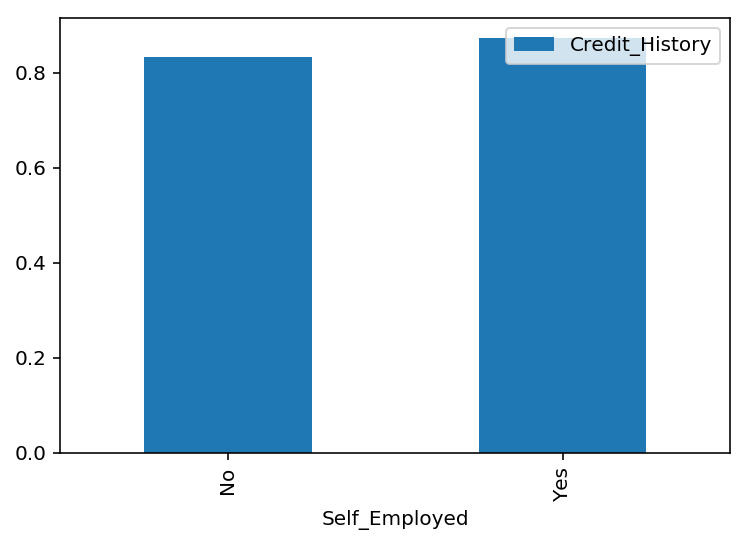

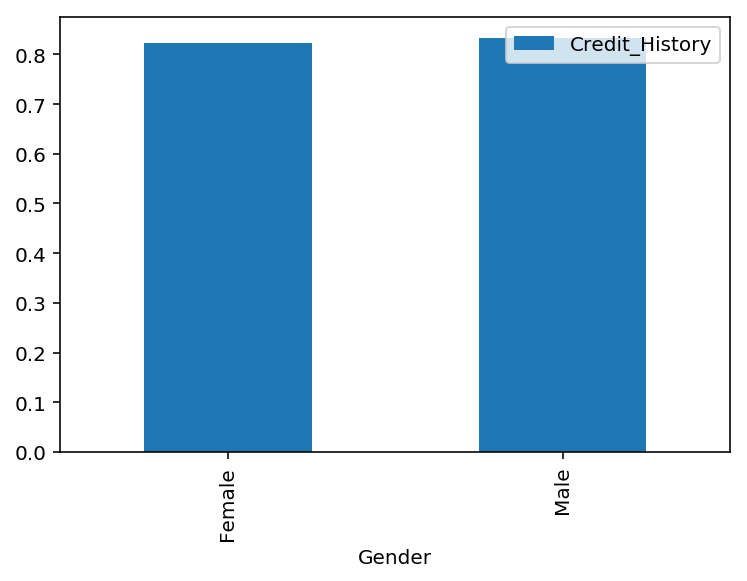

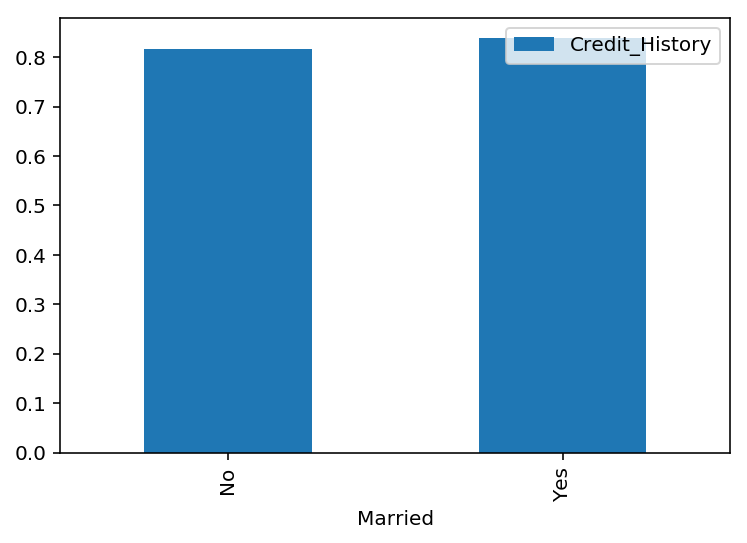

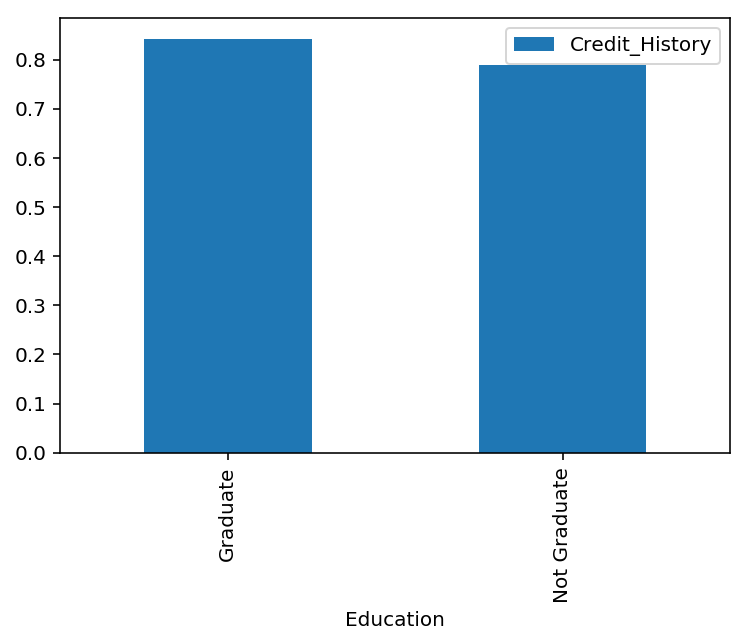

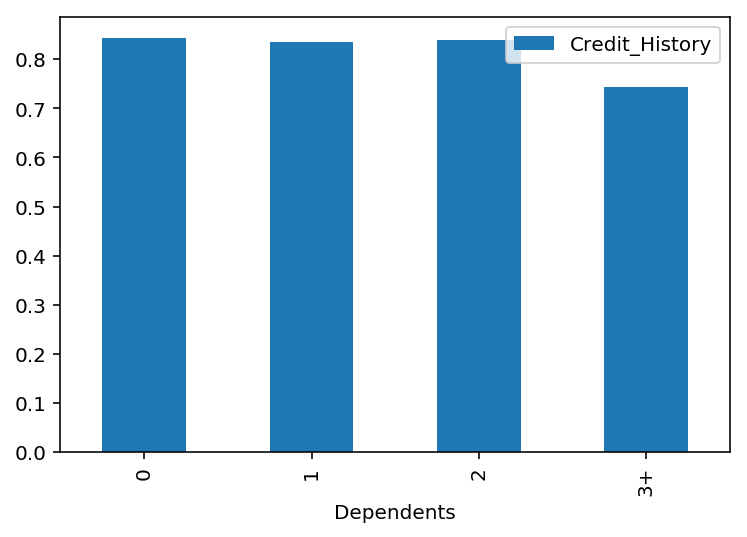

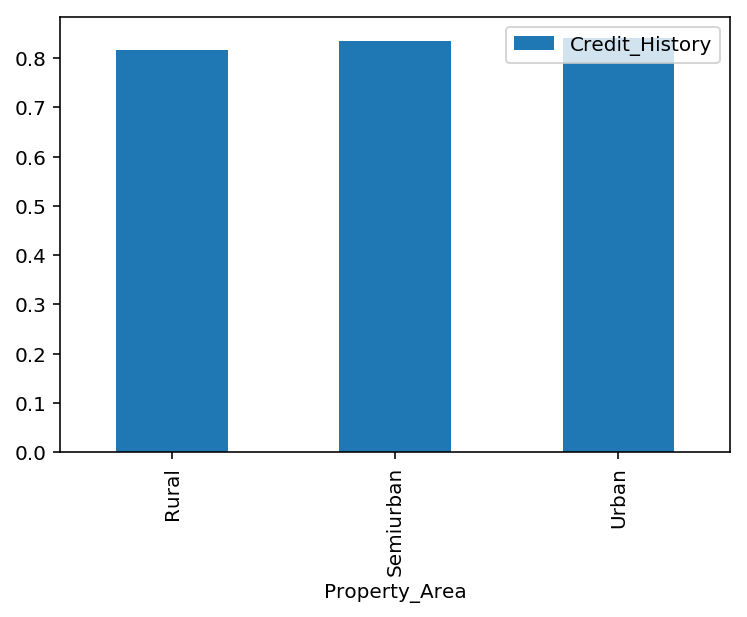

In [22]:
for pivot in pivots:
    pivot.plot(kind='bar')
    plt.show()

/ext/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


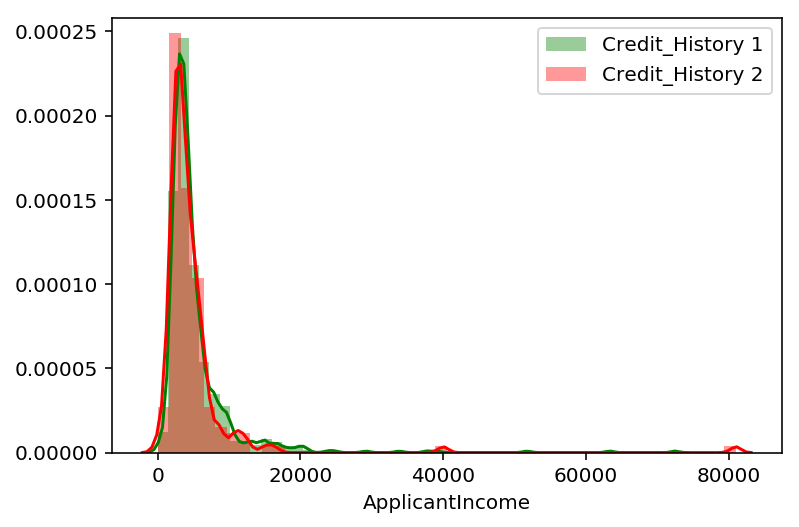

In [23]:
field = 'ApplicantIncome'
sns.distplot(combined[(~combined.ApplicantIncome.isnull()) & (combined.Credit_History == 1)][field],color='g')
sns.distplot(combined[(~combined.ApplicantIncome.isnull()) & (combined.Credit_History == 0)][field],color='r')
plt.legend(['Credit_History 1','Credit_History 2'])
plt.show()

In [24]:
# Can't see any clear distinction
# Let's replace missing values with groupwise mode
pivot = train.pivot_table(
        index=['Self_Employed', 'Property_Area', 'Dependents', 'Gender', 'Education', 'Married'],
        values='Credit_History', aggfunc=('mean', 'count'))

missed = 0
chPredictions = []
for i in range(len(test)):
    if np.isnan(test.loc[i,].Credit_History):#.isnull():
        #print(i)
        chance = 0.0
        try:
            chance = pivot.loc[test.loc[i,].Self_Employed].loc[test.loc[i,].Property_Area].loc[test.loc[i,].Dependents].loc[test.loc[i,].Gender].loc[test.loc[i,].Education].loc[test.loc[i,].Married]['mean']
        except:
            chance = 1.0
            missed = missed + 1
        pred = 1.0 if chance > 0.75 else 0.0
        chPredictions.append(pred)
        test.loc[i,].Credit_History = pred
#print(missed)

test.loc[np.isnan(test.Credit_History),"Credit_History"] = chPredictions




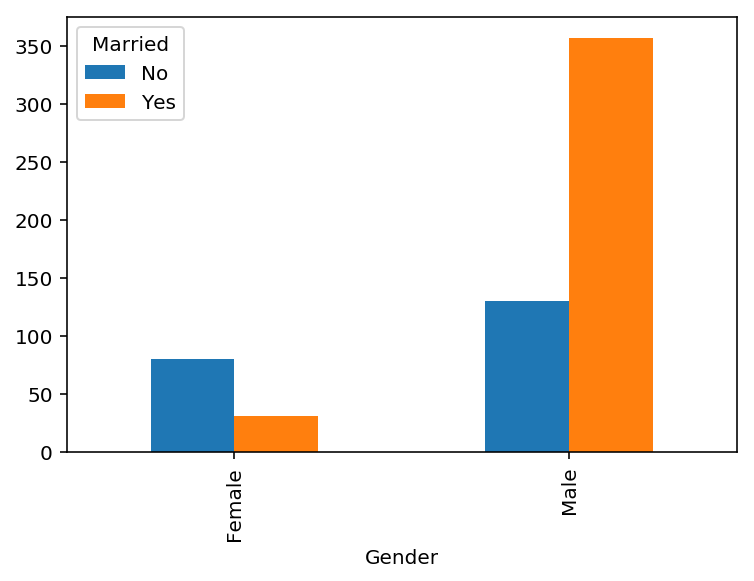

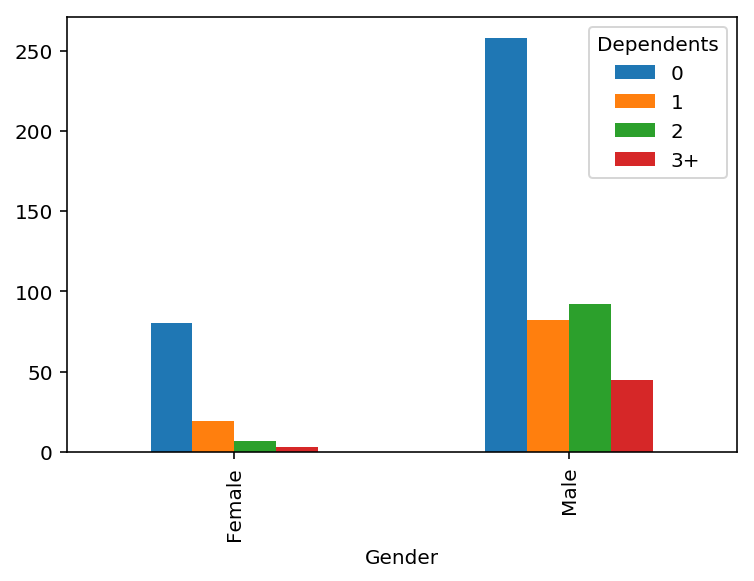

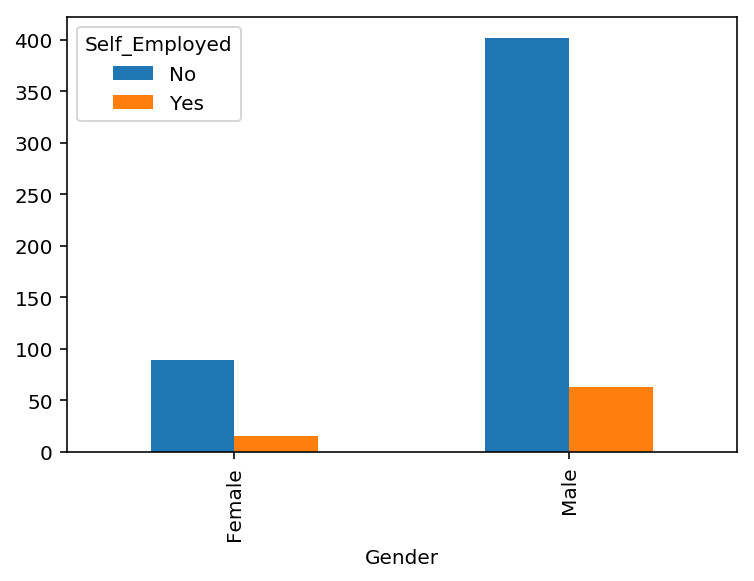

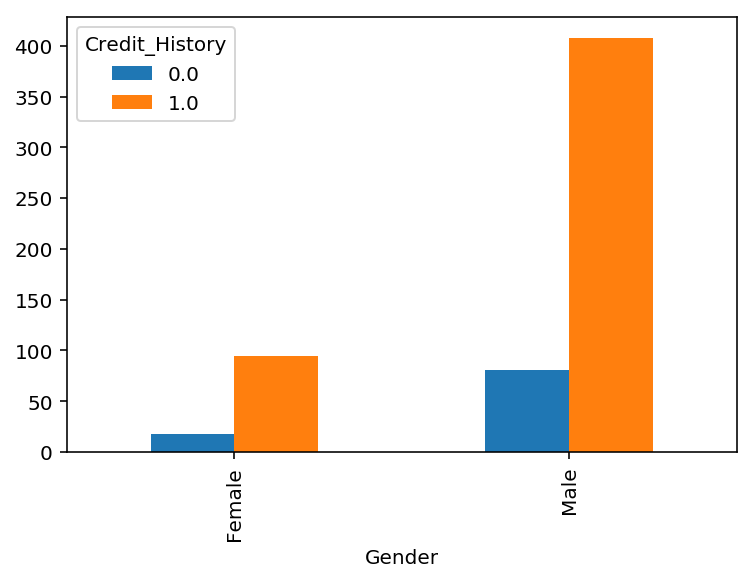

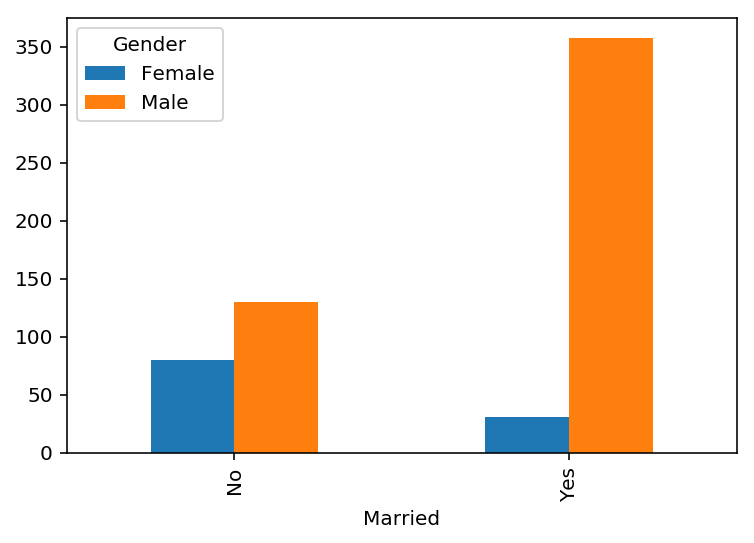

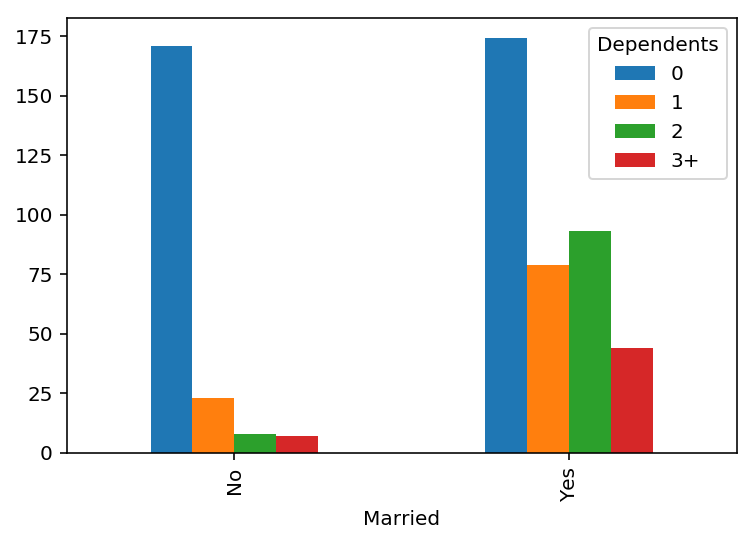

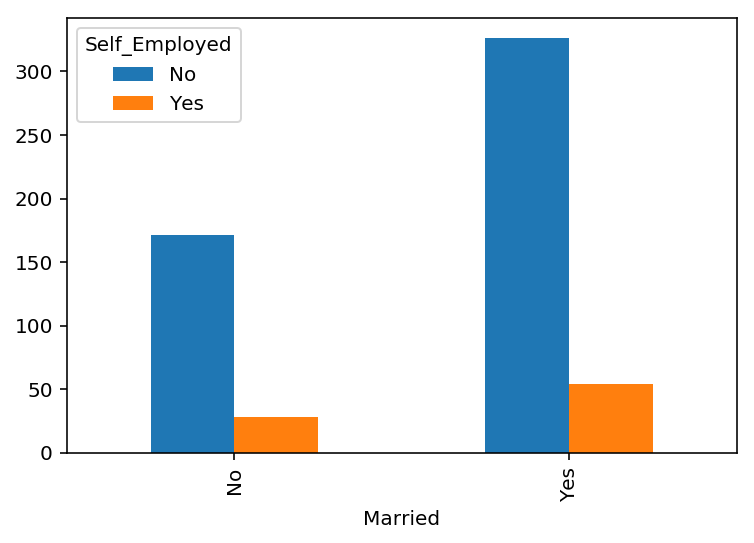

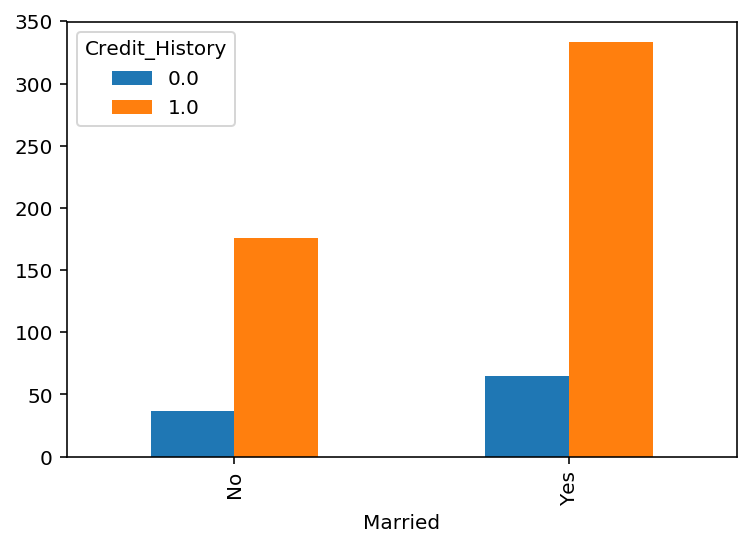

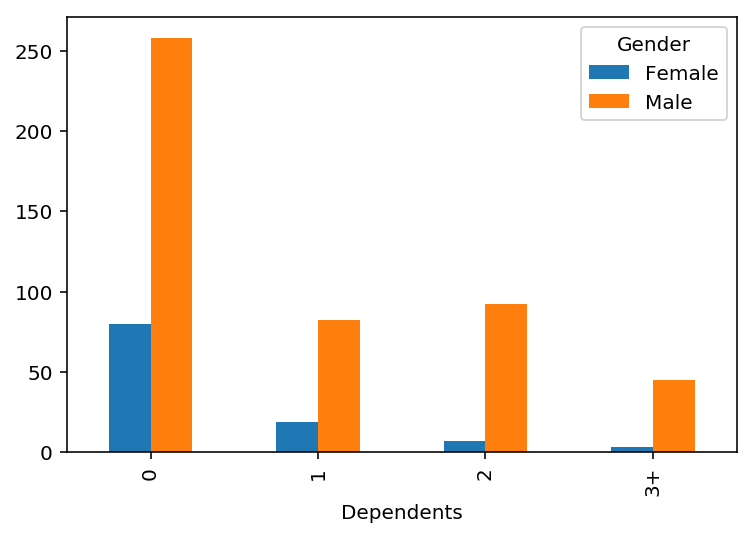

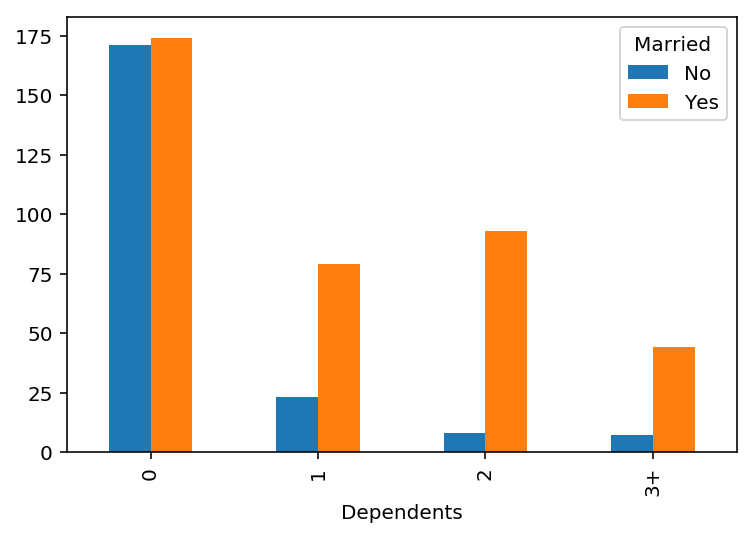

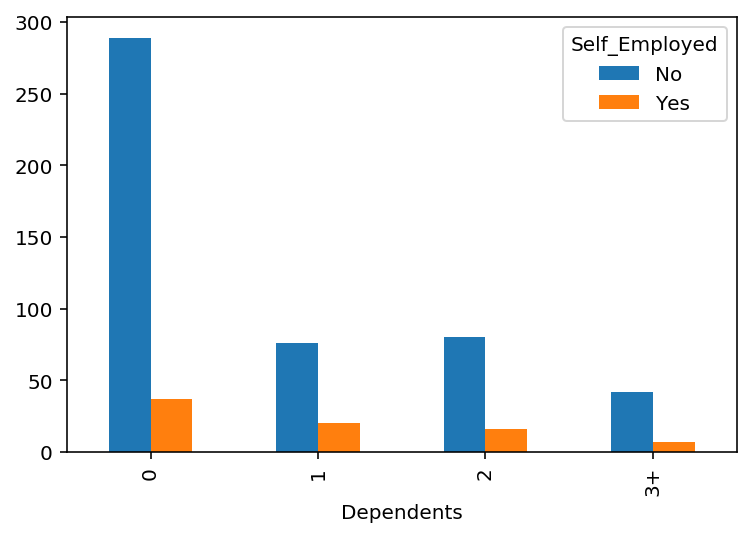

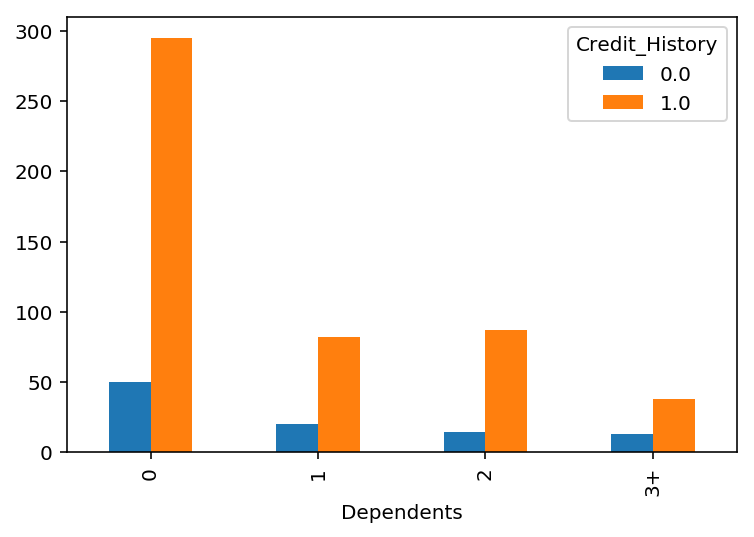

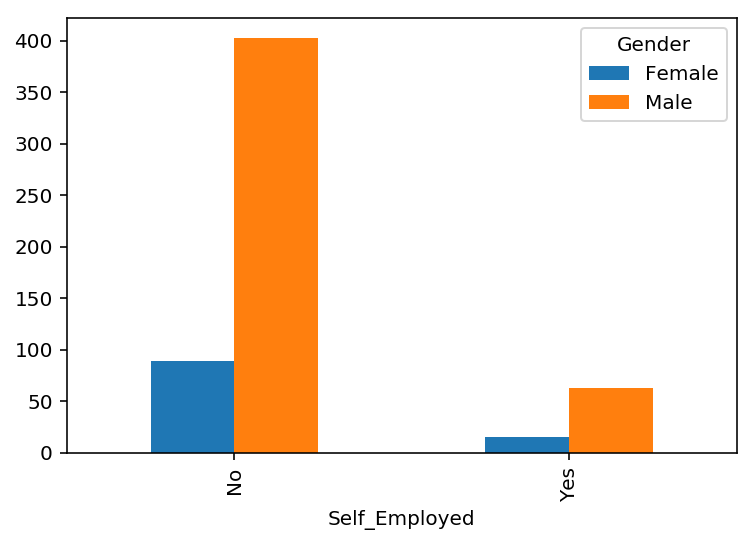

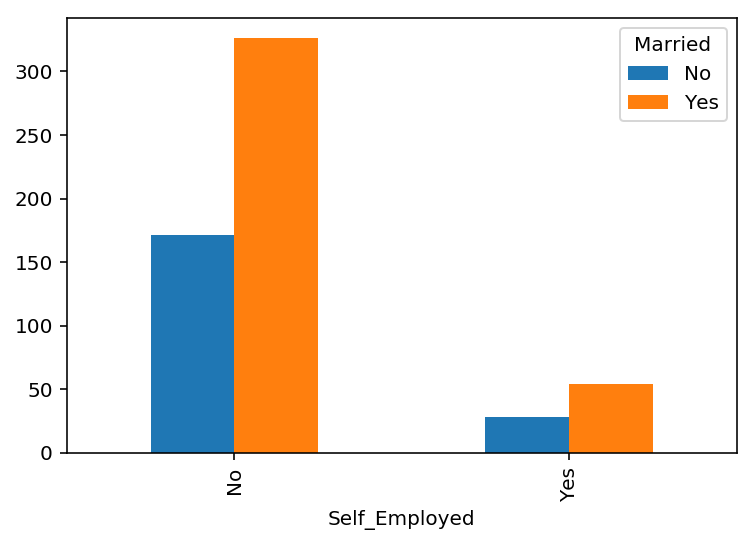

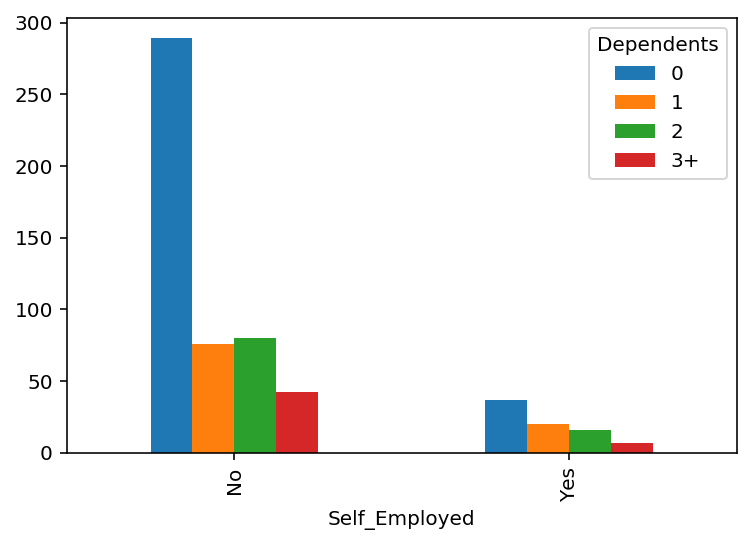

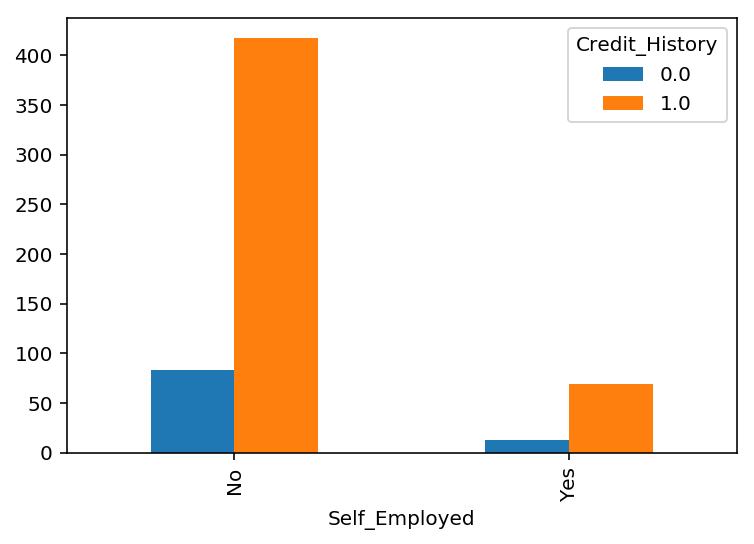

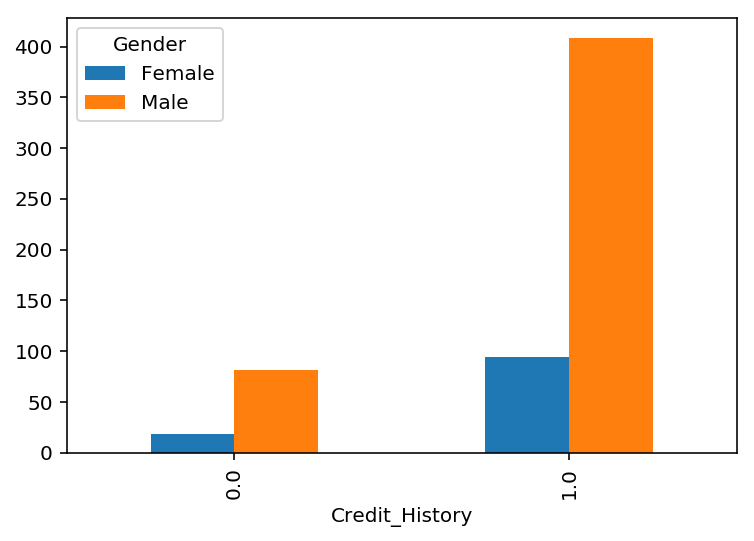

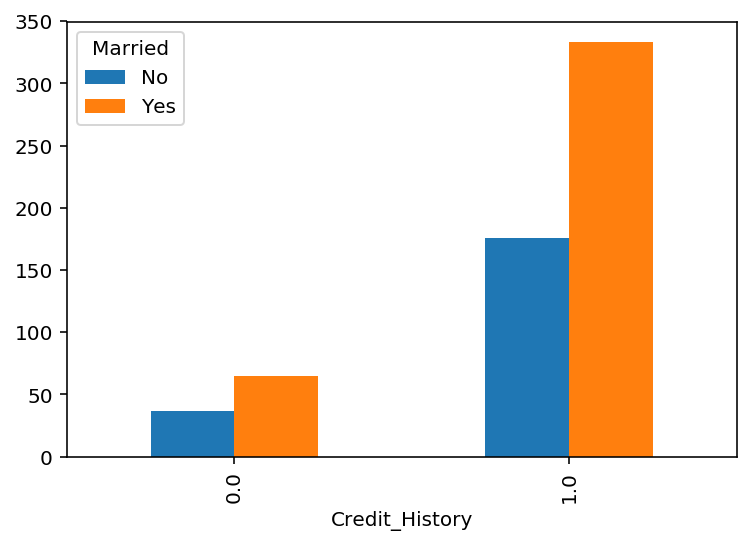

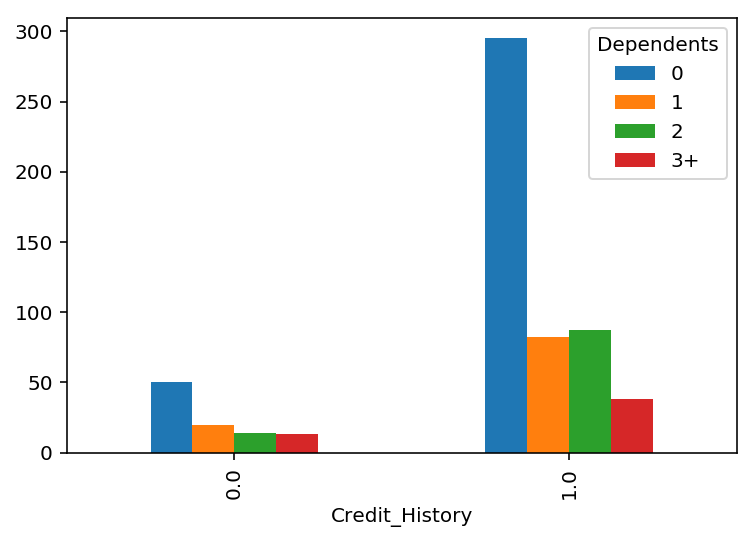

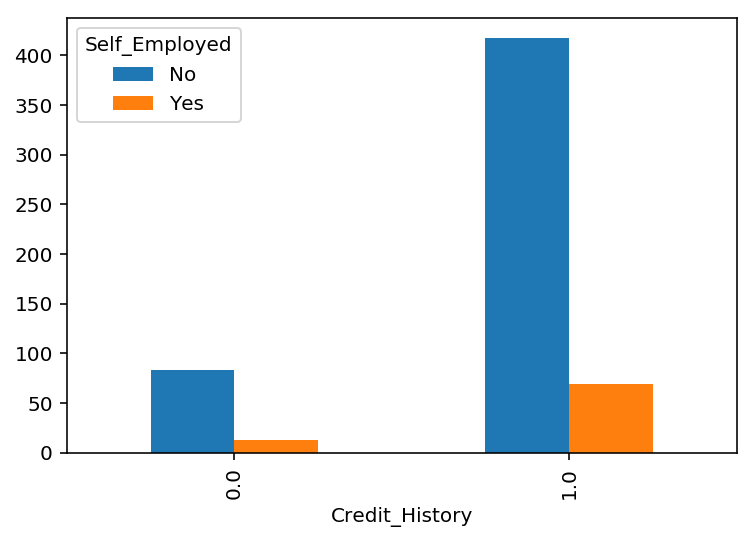

In [25]:
# Let's look at other missing variables
missingColsCat = ['Gender', 'Married', 'Dependents', 'Self_Employed','Credit_History']
for i in range(len(missingColsCat)):
    for j in range(len(missingColsCat)):
        if i != j:
            pd.crosstab(train[missingColsCat[i]],train[missingColsCat[j]]).plot(kind='bar')
            plt.show()

In [26]:
# Let's impute other missung values with the mode
combined = pd.concat([train,test])
# Given gender we can talk about marriage distinctly. Male -> Married and Female -> Not Married 
combined.loc[(combined.Gender.isnull()) & (combined.Gender == 'Male'),'Married'] = 'Yes'
combined.loc[(combined.Gender.isnull()) & (combined.Gender == 'Female'),'Married'] = 'No'
# Let's impute other missung values with the mode
combined.Gender.fillna('Male',inplace=True)
combined.Married.fillna('Yes',inplace=True)
combined.Dependents.fillna('0',inplace=True)
combined.Self_Employed.fillna('No',inplace=True)
combined.LoanAmount.fillna(np.mean(combined.LoanAmount),inplace=True)
combined.Loan_Amount_Term.fillna(360.0,inplace=True)

train,test = combined[:len(train)],combined[len(train):]
test = test.drop(['Loan_Status'],axis=1)

In [27]:
# Check if missing values have been removed
print('Rows with missing values in train:')
print(train.apply(lambda x: (x.isnull().sum() > 0), axis=1).sum() * 100 / len(train))
print('Rows with missing values in test:')
print(test.apply(lambda x: (x.isnull().sum() > 0), axis=1).sum() * 100 / len(test))


Rows with missing values in train:
0.0
Rows with missing values in test:


0.0


In [30]:
# Let's try to engineer some features

In [29]:
# Loan_Amount and Application/Coapplicant Income don't seem to make a difference which is surprising. Maybe the ratio of Loan_Amount to the income might be important
train.loc[:,'TotalIncome'] = train.ApplicantIncome + train.CoapplicantIncome
train.loc[:,'ILR'] = train.TotalIncome / train.LoanAmount


/ext/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/ext/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


/ext/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


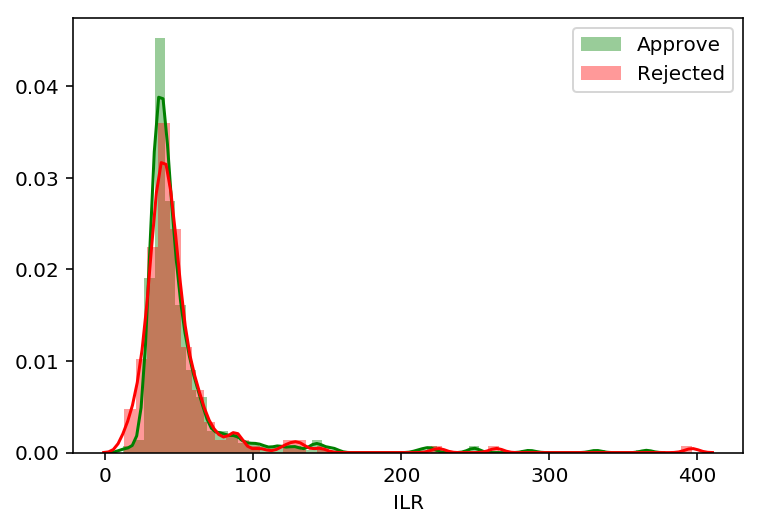

In [31]:
field = 'ILR'
sns.distplot(train[(~train.ILR.isnull()) & (train.Loan_Status == 1)][field],color='g')
sns.distplot(train[(~train.ILR.isnull()) & (train.Loan_Status == 0)][field],color='r')
plt.legend(['Approve','Rejected'])
plt.show()

In [32]:
# Even this doesn't seem to have an effect!
# Since the loan is paid over several years in monthly installments, the ratio of the income to the EMI might be more significant.
# Also, rate of interest for the loan should also be considered, let's assume it to be 7%
interestRate = 0.07
# Get the number of years for which the loan is sanctioned
train.Loan_Amount_Term = train.Loan_Amount_Term / 12
train.loc[:,'LoanRepayAmount'] = train.apply(lambda x: x['LoanAmount']*((1 + interestRate)**x['Loan_Amount_Term']),axis=1)
train.loc[:,'LoanEMI'] = train.apply(lambda x: x['LoanAmount']*interestRate*((1 + interestRate)**x['Loan_Amount_Term']/((1+interestRate)**(x['Loan_Amount_Term']-1))),axis=1)
train.loc[:,'IEMIR'] = train.TotalIncome / train.LoanEMI

/ext/anaconda3/lib/python3.5/site-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/ext/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


/ext/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


/ext/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


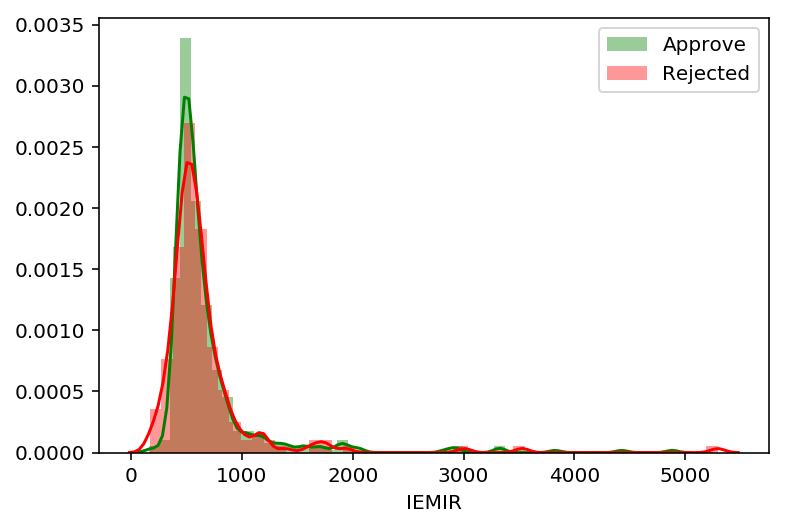

In [33]:
field = 'IEMIR'
sns.distplot(train[(~train.IEMIR.isnull()) & (train.Loan_Status == 1)][field],color='g')
sns.distplot(train[(~train.IEMIR.isnull()) & (train.Loan_Status == 0)][field],color='r')
plt.legend(['Approve','Rejected'])
plt.show()

In [34]:
# Still doesn't seem to be very significant, but intuitively this IEMIR variable should matter. We'll explore it further later.